# Figure 16-17 - Owen et al. (2012)

In [ ]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
import wind_ae.wrapper.wrapper_utils.constants as const
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import numpy as np 
import os

##### James Owen (private correspodance)

"X-ray luminosity of 1e30 erg/s at a distance of 0.1 AU from the host star. The 3 columns are log10(radius), log10(mass) and log10(mdot) all in cgs. Zeros indicate collisionless outflow (or Roche lobe overflow). 

Radius is penetration depth of X-ray (~1keV photons) ($R_{XUV}$)"

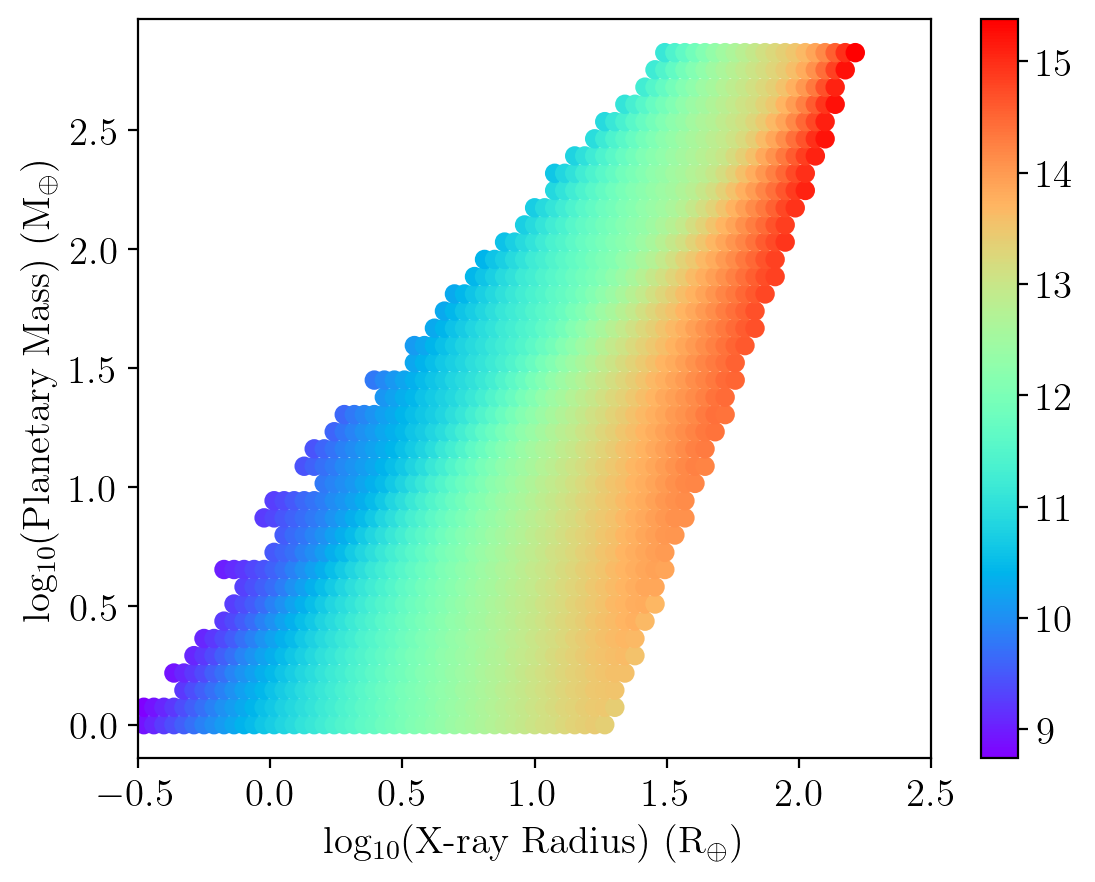

In [ ]:
log10rad,log10mass,log10mdot = np.genfromtxt('data/Owen2012/MdotLx30.out',delimiter=',').T
r_xray = 10**log10rad
mass = 10**log10mass
mdot = 10**log10mdot

plt.scatter(np.log10(r_xray[log10mdot!=0]/const.Rearth),np.log10(mass[log10mdot!=0]/const.Mearth),
            c=log10mdot[log10mdot!=0],cmap='rainbow')
plt.colorbar()
# plt.ylim(-1,15)
plt.xlim(-0.5,2.5)
plt.ylabel(r'log$_{10}$(Planetary Mass) (M$_\oplus$)')
plt.xlabel(r'log$_{10}$(X-ray Radius) (R$_\oplus$)')

plt.show()

/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_49374/776166702.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(sorted_arr1/const.Rjupiter,np.log10(sorted_arr2),c=LS[k],ls='--',
/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_49374/776166702.py:62: RuntimeWarning: divide by zero encountered in log10
  plt.plot(sorted_arr1/const.Rjupiter,np.log10(sorted_arr2),c=LS[k],ls='--')
/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_49374/776166702.py:62: RuntimeWarning: divide by zero encountered in log10
  plt.plot(sorted_arr1/const.Rjupiter,np.log10(sorted_arr2),c=LS[k],ls='--')


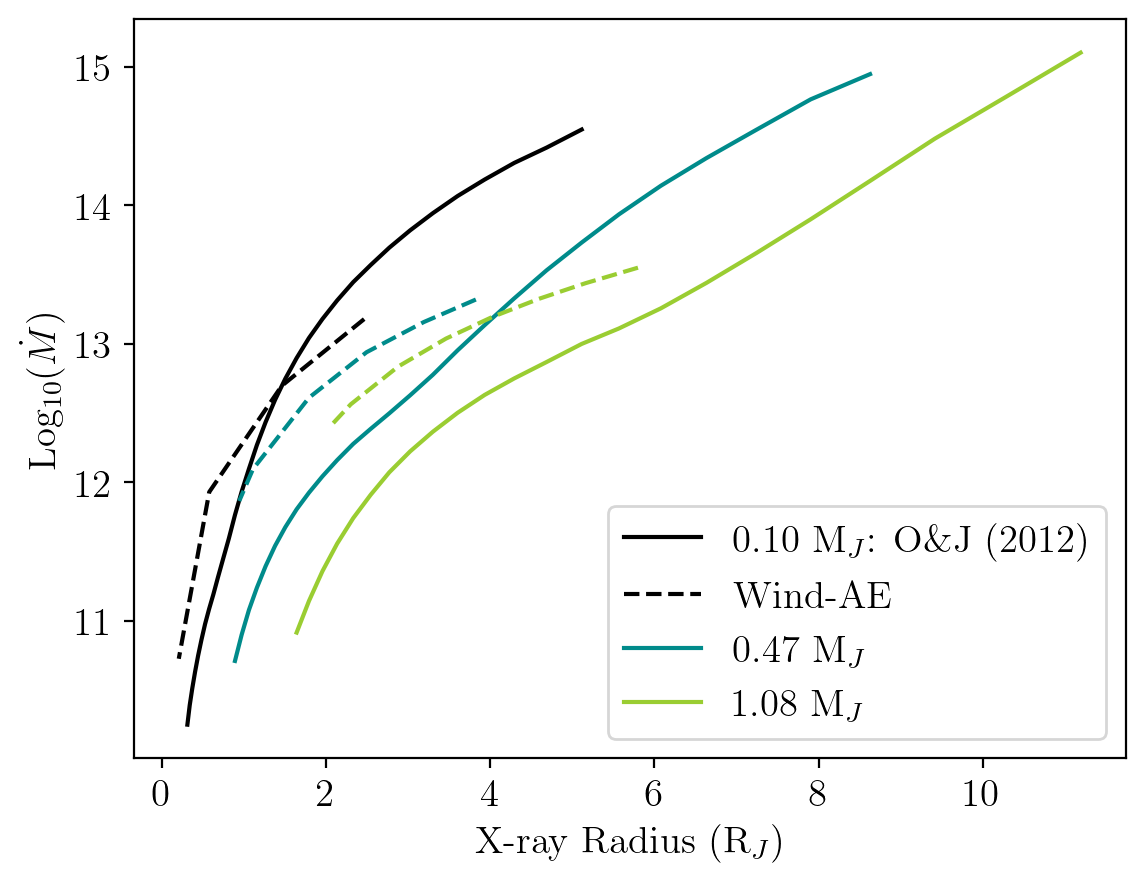

In [11]:
Ms = [33.33]
# LS = ['-','--',':']
LS = ['black','darkcyan','yellowgreen']
dirlist = os.listdir('data/Owen2012/grid2')
for k,M in enumerate(Ms):
    mm = np.zeros(len(dirlist))
    rr = np.zeros(len(dirlist))
    mdotss = np.zeros(len(dirlist))
    sim=wind_sim()
    for i,name in enumerate(dirlist):
        if name.split('_')[0][:-2]==str(M):
            sim.load_uservars('data/Owen2012/grid2/'+name)
            mm[i] = sim.windsoln.Mp
            R_xray,idx = sim.windsoln.calc_tau1_radius(1000,'eV')
            rr[i] = R_xray*sim.windsoln.Rp
            mdotss[i] = sim.windsoln.Mdot

    slices = np.where((mass/const.Mearth<np.ceil(M)) & (mass/const.Mearth>np.floor(M)))
    line_mass = mass[slices][log10mdot[slices]>0]
    line_rad = r_xray[slices][log10mdot[slices]>0]
    line_mdots = log10mdot[slices][log10mdot[slices]>0]

    plt.plot(line_rad/const.Rjupiter,line_mdots,c=LS[k],ls='-',
             label=r'0.10 M$_J$: O\&J (2012)')
    plt.xlabel('X-ray Radius (R$_J$)')
    plt.ylabel(r'Log$_{10}(\dot{M})$')
    arr1inds = rr.argsort()
    sorted_arr1 = rr[arr1inds[::-1]]
    sorted_arr2 = mdotss[arr1inds[::-1]]
    plt.plot(sorted_arr1/const.Rjupiter,np.log10(sorted_arr2),c=LS[k],ls='--',
            label='Wind-AE')

Ms = [149.23,343.45]
# LS = ['-','--',':']
LS = ['darkcyan','yellowgreen']
dirlist = os.listdir('data/Owen2012/grid2')
for k,M in enumerate(Ms):
    mm = np.zeros(len(dirlist))
    rr = np.zeros(len(dirlist))
    mdotss = np.zeros(len(dirlist))
    sim=wind_sim()
    for i,name in enumerate(dirlist):
        if name.split('_')[0][:-2]==str(M):
            sim.load_uservars('data/Owen2012/grid2/'+name)
            mm[i] = sim.windsoln.Mp
            R_xray,idx = sim.windsoln.calc_tau1_radius(1000,'eV')
            rr[i] = R_xray*sim.windsoln.Rp
            mdotss[i] = sim.windsoln.Mdot

    slices = np.where((mass/const.Mearth<np.ceil(M)) & (mass/const.Mearth>np.floor(M)))
    line_mass = mass[slices][log10mdot[slices]>0]
    line_rad = r_xray[slices][log10mdot[slices]>0]
    line_mdots = log10mdot[slices][log10mdot[slices]>0]

    plt.plot(line_rad/const.Rjupiter,line_mdots,c=LS[k],ls='-',
             label='%.2f M$_{J}$' %(M*const.Mearth/const.Mjupiter))
    plt.xlabel('X-ray Radius (R$_J$)')
    plt.ylabel(r'Log$_{10}(\dot{M})$')
    arr1inds = rr.argsort()
    sorted_arr1 = rr[arr1inds[::-1]]
    sorted_arr2 = mdotss[arr1inds[::-1]]
    plt.plot(sorted_arr1/const.Rjupiter,np.log10(sorted_arr2),c=LS[k],ls='--')
    plt.legend()
#     plt.title()
# plt.savefig('../Figures/Final/james_grid_compare.pdf',dpi=500,
#             facecolor='white',bbox_inches='tight')
plt.show()

## Comparison to Profile

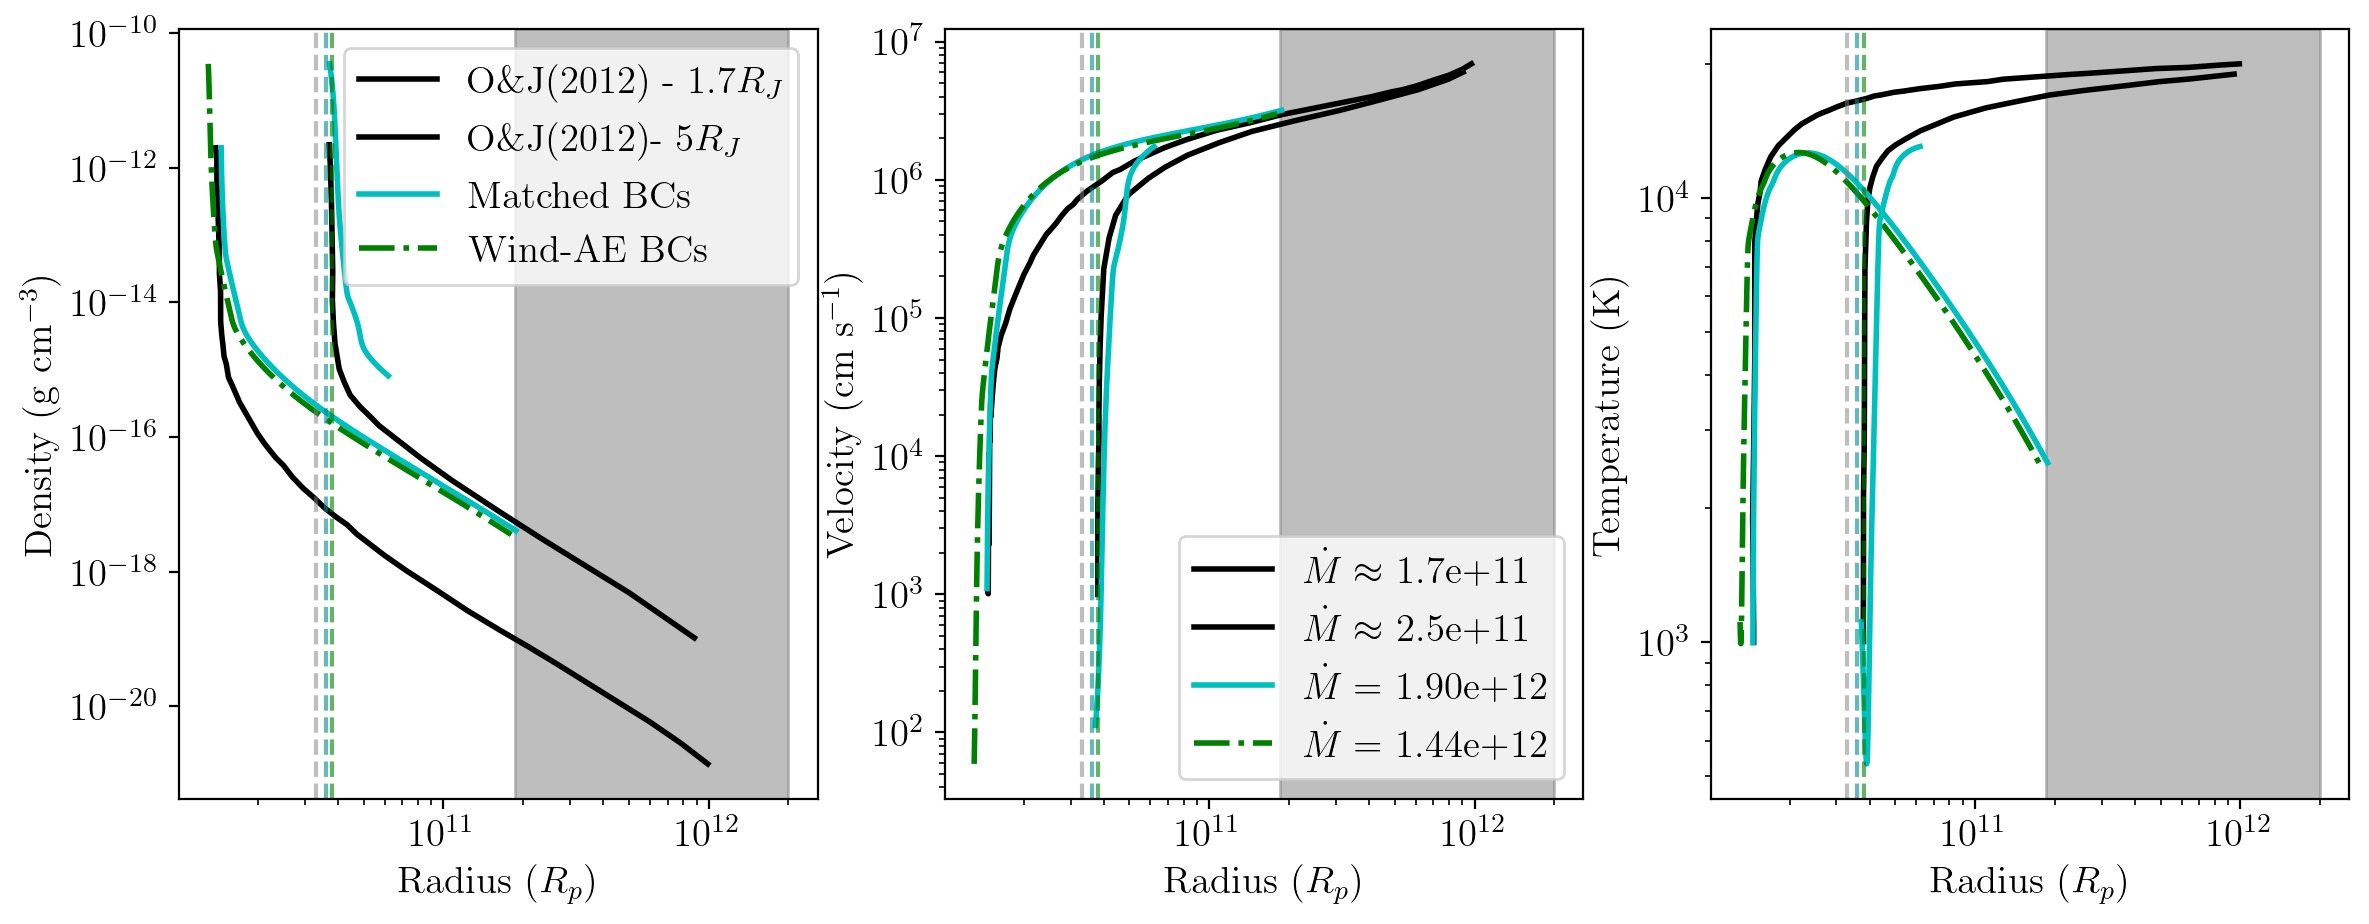

In [ ]:
sim = wind_sim()
path = 'data/'
sim.load_uservars(path+'Owen2012/matching_james_bcs.csv')
sim2 = wind_sim()
sim2.load_uservars(path+'Owen2012/james_H-He_13.6-2000eV.csv')
sim3 = wind_sim()
sim3.load_uservars(path+'Owen2012/big_james_H-He_13.6-2000eV.csv')
# sim.load_planet('saves/for_paper/james/james_H-He_13.6-2000eV.csv',expedite=False)
r_temp,temp = (np.genfromtxt(path+'Owen2012/temperature_19Me.csv',delimiter=', ').T)
r_dens,dens = (np.genfromtxt(path+'Owen2012/density_19Me.csv',delimiter=', ').T)
data = (np.genfromtxt(path+'Owen2012/velocity_unsorted_19Me.csv',delimiter=', '))
data_sorted = data[data[:,0].argsort()]
r_vel,vel = data_sorted.T

r_temp2,temp2 = np.genfromtxt('data/Owen2012/temperature_big.csv',delimiter=',',skip_header=1).T
r_dens2,dens2 = np.genfromtxt('data/Owen2012/density_big.csv',delimiter=',',skip_header=1).T
r_vel2,vel2 = np.genfromtxt('data/Owen2012/velocity_big.csv',delimiter=',',skip_header=1).T

r = sim.windsoln.soln['r']
r2 = sim2.windsoln.soln['r']
rb = sim3.windsoln.soln['r']
fig,ax = plt.subplots(1,3,figsize=(14,5))

rmax = 2e12
ax[2].loglog(r_temp,temp,lw=2,c='k')
ax[2].loglog(r_temp2,temp2,lw=2,c='k')
ax[2].loglog(r,sim.windsoln.soln['T'],c='c',lw=2)
ax[2].loglog(r2,sim2.windsoln.soln['T'],c='g',lw=2,ls='-.')
ax[2].loglog(rb,sim3.windsoln.soln['T'],c='c',lw=2)
lims = np.copy(ax[2].get_ylim())
ax[2].fill_betweenx(lims,sim.windsoln.R_cori*sim.windsoln.Rp,rmax,
                   color='tab:gray',alpha=0.5)
ax[2].set_ylim(lims)
ax[2].set_ylabel('Temperature (K)')

ax[0].loglog(r_dens,dens,lw=2,c='k',label=r'O$\&$J(2012) - 1.7$R_J$')
ax[0].loglog(r_dens2,dens2,lw=2,c='k',label=r'O$\&$J(2012)- 5$R_J$')
ax[0].loglog(r,sim.windsoln.soln['rho'],c='c',lw=2,label='Matched BCs')
ax[0].loglog(r2,sim2.windsoln.soln['rho'],c='g',lw=2,ls='-.',label='Wind-AE BCs')
ax[0].loglog(rb,sim3.windsoln.soln['rho'],c='c',lw=2)
lims = np.copy(ax[0].get_ylim())
ax[0].fill_betweenx(lims,sim.windsoln.R_cori*sim.windsoln.Rp,rmax,
                   color='tab:gray',alpha=0.5)
ax[0].set_ylim(lims)
ax[0].set_ylabel('Density (g cm$^{-3}$)')
ax[0].legend()

ax[1].loglog(r_vel,vel,lw=2,c='k',label=r'$\dot{M}\approx$ %.1e'%172175411032.9377)
ax[1].loglog(r_vel2,vel2,lw=2,c='k',label=r'$\dot{M}\approx$ %.1e'%251188643150)
ax[1].loglog(r,sim.windsoln.soln['v'],c='c',lw=2,label=r'$\dot{M}=$ %.2e'%sim.windsoln.Mdot)
ax[1].loglog(r2,sim2.windsoln.soln['v'],c='g',lw=2,ls='-.',label=r'$\dot{M}=$ %.2e'%sim2.windsoln.Mdot)
ax[1].loglog(rb,sim3.windsoln.soln['v'],c='c',lw=2)
lims = np.copy(ax[1].get_ylim())
ax[1].fill_betweenx(lims,sim.windsoln.R_cori*sim.windsoln.Rp,rmax,color='tab:gray',alpha=0.5)
ax[1].set_ylim(lims)
ax[1].set_ylabel('Velocity (cm s$^{-1}$)')
ax[1].legend()
for i in range(3):
#     ax[i].set_xlim(right=12)
#     ax[i].set_xticks([1,2,4,10,100],labels=['1','2','4','10','100'])
    ax[i].set_xlabel('Radius ($R_p$)')
    ax[i].axvline(3.3e10,c='tab:gray',ls='--',alpha=0.5)
    ax[i].axvline(sim.windsoln.R_sp*sim.windsoln.Rp,c='darkcyan',ls='--',alpha=0.6)
    ax[i].axvline(sim2.windsoln.R_sp*sim2.windsoln.Rp,c='g',ls='--',alpha=0.6)

plt.show()

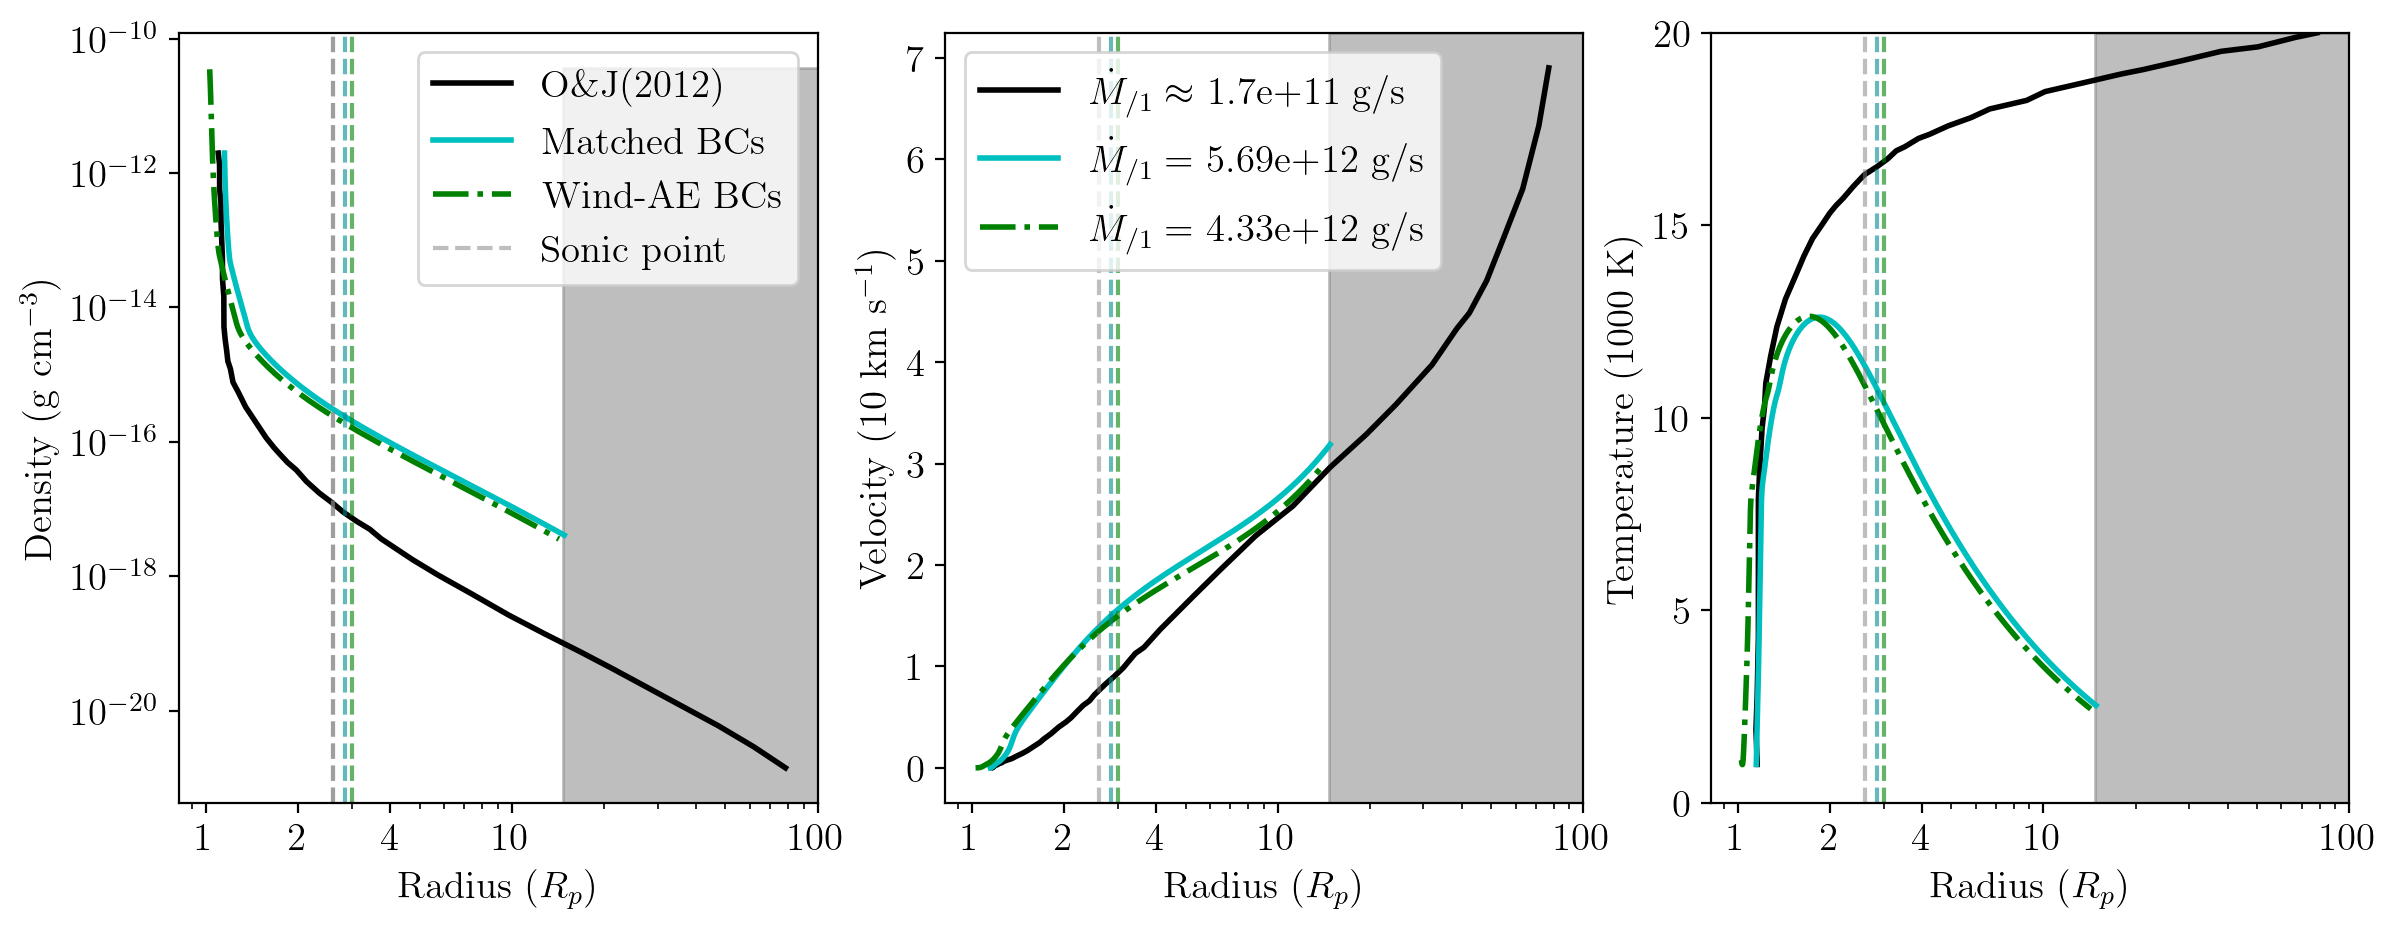

In [ ]:
sim = wind_sim()
path = 'data/'
sim.load_uservars(path+'Owen2012/matching_james_bcs.csv')
sim2 = wind_sim()
sim2.load_uservars(path+'Owen2012/james_H-He_13.6-2000eV.csv')
sim3 = wind_sim()
sim3.load_uservars(path+'Owen2012/big_james_H-He_13.6-2000eV.csv')
# sim.load_planet('saves/for_paper/james/james_H-He_13.6-2000eV.csv',expedite=False)
r_temp,temp = (np.genfromtxt(path+'Owen2012/temperature_19Me.csv',delimiter=', ').T)
r_dens,dens = (np.genfromtxt(path+'Owen2012/density_19Me.csv',delimiter=', ').T)
data = (np.genfromtxt(path+'Owen2012/velocity_unsorted_19Me.csv',delimiter=', '))
data_sorted = data[data[:,0].argsort()]
r_vel,vel = data_sorted.T

r_temp2,temp2 = np.genfromtxt('data/Owen2012/temperature_big.csv',delimiter=',',skip_header=1).T
r_dens2,dens2 = np.genfromtxt('data/Owen2012/density_big.csv',delimiter=',',skip_header=1).T
r_vel2,vel2 = np.genfromtxt('data/Owen2012/velocity_big.csv',delimiter=',',skip_header=1).T

r = sim.windsoln.soln_norm['r']
r2 = sim2.windsoln.soln_norm['r']
rb = sim3.windsoln.soln_norm['r']
fig,ax = plt.subplots(1,3,figsize=(14,5))

ax[2].plot(r_temp/sim.windsoln.Rp,temp/1000,lw=2,c='k')
# ax[2].loglog(r_temp2/sim3.windsoln.Rp,temp2,lw=2,c='k')
ax[2].plot(r,sim.windsoln.soln['T']/1000,c='c',lw=2)
ax[2].plot(r2,sim2.windsoln.soln['T']/1000,c='g',lw=2,ls='-.')
# ax[2].loglog(rb,sim3.windsoln.soln['T'],c='c',lw=2)
ax[2].set_ylim(0,20)
ax[2].set_yticks([0,5,10,15,20])
ax[2].set_yticklabels(['0','5','10','15','20'])
lims = np.copy(ax[2].get_ylim())
ax[2].fill_betweenx(lims,sim.windsoln.R_cori,100,
                   color='tab:gray',alpha=0.5)
ax[2].set_ylabel('Temperature (1000 K)')
ax[2].set_xscale('log')


ax[0].plot(r_dens/sim.windsoln.Rp,dens,lw=2,c='k',label=r'O$\&$J(2012)')
# ax[0].loglog(r_dens2/sim3.windsoln.Rp,dens2,lw=2,c='k',label=r'O$\&$J(2012)- 5$R_J$')
ax[0].plot(r,sim.windsoln.soln['rho'],c='c',lw=2,label='Matched BCs')
ax[0].plot(r2,sim2.windsoln.soln['rho'],c='g',lw=2,ls='-.',label='Wind-AE BCs')
ax[0].axvline(3.3e10/sim.windsoln.Rp,c='tab:gray',ls='--',alpha=0.5,label='Sonic point')
# ax[0].loglog(rb,sim3.windsoln.soln['rho'],c='c',lw=2)
lims = np.copy(ax[0].get_ylim())
ax[0].fill_betweenx(lims,sim.windsoln.R_cori,100,
                   color='tab:gray',alpha=0.5)
# ax[0].set_ylim(lims)
ax[0].set_ylabel('Density (g cm$^{-3}$)')
ax[0].legend(fontsize=14)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].plot(r_vel/sim.windsoln.Rp,vel/1e6,lw=2,c='k',label=r'$\dot{M}_{/1}\approx$ %.1e g/s'%172175411032.9377)
# ax[1].loglog(r_vel2/sim3.windsoln.Rp,vel2,lw=2,c='k',label=r'$\dot{M}\approx$ %.1e'%251188643150)
ax[1].plot(r,sim.windsoln.soln['v']/1e6,c='c',lw=2,label=r'$\dot{M}_{/1}=$ %.2e g/s'%(sim.windsoln.Mdot*3))
ax[1].plot(r2,sim2.windsoln.soln['v']/1e6,c='g',lw=2,ls='-.',label=r'$\dot{M}_{/1}=$ %.2e g/s'%(sim2.windsoln.Mdot*3))
# ax[1].loglog(rb,sim3.windsoln.soln['v'],c='c',lw=2)
lims = np.copy(ax[1].get_ylim())
ax[1].fill_betweenx(lims,sim.windsoln.R_cori,100,color='tab:gray',alpha=0.5)
ax[1].set_ylim(lims)
ax[1].set_ylabel('Velocity (10 km s$^{-1}$)')
ax[1].set_xscale('log')
# ax[1].legend(fontsize=14)
ax[1].legend(fontsize=14)
for i in range(3):
    ax[i].set_xlim(right=12)
    ax[i].set_xticks([1,2,4,10,100],labels=['1','2','4','10','100'])
    ax[i].set_xlabel('Radius ($R_p$)')
    ax[i].axvline(3.3e10/sim.windsoln.Rp,c='tab:gray',ls='--',alpha=0.5)
    ax[i].axvline(sim.windsoln.R_sp,c='darkcyan',ls='--',alpha=0.6)
    ax[i].axvline(sim2.windsoln.R_sp,c='g',ls='--',alpha=0.6)
    
plt.show()